# Part 2: Graph Laplacian and Spectral Embedding

## The Matrix Form of Equation of Motion

In the previous situation, where we have three equal-mass particles connected pairwisely by the spring, we have the equation of motion:

$$
\begin{aligned}
&m\frac{d^2 x_1}{dt^2} = - (k_{12} + k_{13})x_1 + k_{12} x_2 + k_{13} x_3 \\
&m\frac{d^2 x_2}{dt^2} = - (k_{21} + k_{23})x_2 + k_{21} x_1 + k_{23} x_3 \\
&m\frac{d^2 x_3}{dt^2} = - (k_{31} + k_{32})x_3 + k_{31} x_1 + k_{32} x_2\\
\end{aligned}
$$

If we put the coordinates $x_1, x_2, x_3$ into a vector $\mathbf{x} = (x_1,x_2,x_3)^T$, we could write that 

$$
\begin{aligned}
\frac{d^2 }{dt^2} \mathbf{x} &= \begin{pmatrix} 
- (k_{12} + k_{13}) & k_{12} & k_{13} \\
k_{21} &  - (k_{21} + k_{23}) & k_{23} \\
k_{31} & k_{32} & - (k_{31}+k_{32})
\end{pmatrix} \mathbf{x} \\
&= \begin{pmatrix} k_{11}- (k_{11}+ k_{12} + k_{13}) & k_{12} & k_{13} \\
k_{21} &  k_{22}- (k_{21} + k_{22}+ k_{23}) & k_{23} \\
k_{31} & k_{32} & k_{33}- (k_{31}+k_{32}+k_{33})
\end{pmatrix} \mathbf{x}
\end{aligned}
$$

where in the diagonal terms, we add a term and subtract it off. If we define the matrix $K$ as 

$$
K = 
\begin{pmatrix}
k_{11} & k_{12} & k_{13} \\
k_{21} & k_{22} & k_{23} \\
k_{31} & k_{32} & k_{33}
\end{pmatrix}
$$

and we define the $D$ matrix as 

$$
D = 
\begin{pmatrix}
k_{11} + k_{12} + k_{13} & 0 & 0 \\
0 & k_{21} + k_{22} + k_{23} & 0 \\
0 & 0 & k_{31} + k_{32} + k_{33}
\end{pmatrix}
$$


We could then define $L = D-K$ as the **graph Laplacian** defined by $K$. As a result, the differential equation becomes 

$$
\frac{d^2}{dt^2}\mathbf{x} = - L \mathbf{x}
$$

In the classical mechanics, we would solve the coupled differential equations by using the ansatz $\mathbf{x} = A\exp{i\omega t} $ and the differential equation becomes eigen value equation as 

$$
\omega^2 A = L A.
$$

The eigen vector solution $A$ is called the normal mode of the system. If we prepare $\mathbf{x}$ in the normal modes, the solution would be $\mathbf{x} = A \text{Re}(e^{i\omega t}) = A \cos (\omega t) $ and $\mathbf{x}$ will vanish at $t = \frac{\pi}{2\omega}$. At those times, there are no potential energy and the kinetic energy is proportional to $\omega^2$ and as a result, if $\omega^2$ is larger, the energy is larger. 

Since we already know from the previous section that larger energy will try to break the bonding that bonds the particles, we would like to use the lower energy modes to tell us which pairs have strong bonding and which pairs do not. 

However from the physical point view, if all particles moving in the same direction with not relative motion, there will be no oscillation and this costs no energy (infinitesmal speed will give infinitesmal kinetic energy). This mode has eigenvalue $0$ and eigenvector $(1,1,1)^T$. This is of no interest since we want to use oscillation to clustering particles. We would normally neglect this mode and we will start from the second lowest energy mode. 


## Example:

We would like to extract the lower energy normal mode of the graph laplacian of the three body example. We first construct a function of calculating the Graph Lalacian of a given spring constant matrix $K$. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def GraphLaplacian(K):
    D = np.diag(np.sum(K, axis = 1))
    L = D-K
    return L
    

Recall that the system in the previous section has $k_{12} = 10$, $k_{23} = k_{13} = 1$. We could try to get the eigenvector of the system.

In [2]:
def GetNormalMode(K, first_few = 2):
    L = GraphLaplacian(K)
    eigval, eigvec = np.linalg.eig(L)
    order = np.argsort(eigval)
    chosen = order[1:1+first_few] # neglect the 0 eigen value
    
    return eigvec[:, chosen], eigval[chosen]

In [3]:
k2 = np.zeros((3,3))
k2[0,1] = k2[1,0] = 1  # k12
k2[1,2] = k2[2,1] = 1  # k23
k2[0,2] = k2[2,0] = 10 # k13

normal_modes, freqs = GetNormalMode(k2)
print (freqs)
print (normal_modes)

[ 3. 21.]
[[ 4.08248290e-01 -7.07106781e-01]
 [-8.16496581e-01  5.28040339e-18]
 [ 4.08248290e-01  7.07106781e-01]]


In the above code, we neglected the zero eigenvalue and keep the following eigenvalues. The two modes are 

$$
x(t) = \begin{pmatrix} 0.41 \\ -0.82 \\ 0.41 \end{pmatrix} \cos( \sqrt{3} t) \quad \text{ and } \quad 
x(t) = \begin{pmatrix} -0.71 \\ 0.0 \\ 0.71 \end{pmatrix} \cos (\sqrt{21} t)
$$

Thus, we have low energy in the system, we cannot have strong effects from the second mode and most effects are from the first mode. In the first mode, particel 1 and particle 3 are close to each other. In order to see it clearly, we would plot the normal modes. Let $v = (v_1,v_2,v_3)$ be the eigen mode of the system. Then $v_1$ will be the location of particle 1 at $t = 0$ and $v_2$ will be the  location of particle $2$ are $t=0$. We could use two eigen modes to plot a scatter plot. We let the locations for first mode to be $x$ axis coordinate and the locations for the second mode to be $y$ axis coordinate.

In [4]:
def ScatterNormalMode(normal_modes, ax = None, **kwargs):
    if ax is None:
        ax = plt.gca()
    for i in range(normal_modes.shape[0]):
        ax.scatter(normal_modes[i,0], normal_modes[i,1], marker=f"${i+1}$", s = 20*3*5)
    ax.set_xlabel("normal mode 1")
    ax.set_ylabel("normal mode 2")
    return ax

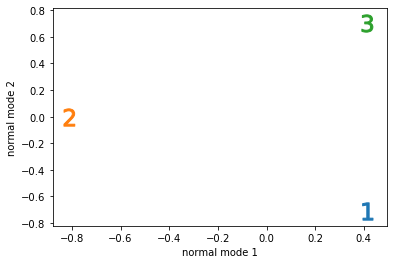

In [5]:
ScatterNormalMode(normal_modes)

It is clear that the particle $1$ and particle $3$ have equal $x$ coordinates and the three particles are equally divided in the $y$ axis. 

## Spectral Embedding

In the previous discussion, we only focus on a three particle system. However we could generalize the idea to system with any number of particles. Given the similarity matrix (spring constant matrix) $K$, we have the following procedures of clustering them:

1. Calculate the graph Laplacian of $K$
2. Get the first few eigen vectors of $L$ ordered increasingly of the eigenvalues: $v^{(1)}, v^{(2)}, \dots, v^{(d)} $.  
3. Give coordinate $(v^{(1)}_i, v^{(2)}_i, \dots, v^{(d)}_i)$ for particle $i$. 

Thus, from the above procedure we put the particles or data points into a new coordinate system with the property that pairs with higher value of $K_{ij}$ (more similarity) are put closer.  This procedure is called **Spectral Embedding** since we used the spectrum (eigenvalues and eigen vectors) to embed the data points. The dimension of the embedding is labeled as $d$, which is the number of eigen vectors we want. 

We give an example with $10$ particles: We let particle $1 \sim 3$ are of same cluster with high values of similarity and $4\sim 8$ are of strong similiarity and $9\sim 10$ are of same similarity. We want the clusterwise similarity to be small and we set them to zero. 

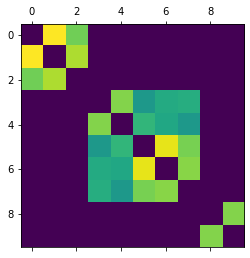

In [6]:
K = np.zeros((10,10))
# first cluster
for i in range(3):
    for j in range(i+1,3):
        K[i,j] = np.random.uniform(5.0, 10.0)
        K[j,i] = K[i,j]
# second cluster
for i in range(3,8):
    for j in range(i+1,8):
        K[i,j] = np.random.uniform(5.0, 10.0)
        K[j,i] = K[i,j]
        
# second cluster
for i in range(8,10):
    for j in range(i+1,10):
        K[i,j] = np.random.uniform(5.0, 10.0)
        K[j,i] = K[i,j]
plt.matshow(K)  

We plot the matrix $K$ by its entry value. It is clear that the similarity matrix are block diagonal. The cross-block terms in the matrix are zeros. This is what we want to design. We want to see how the spectral embedding would work

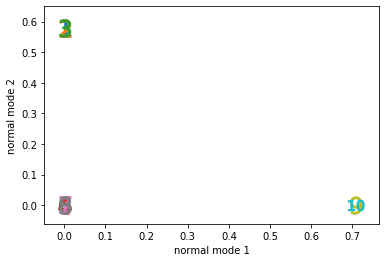

In [7]:
normal_modes, vals = GetNormalMode(K, first_few=2)
ScatterNormalMode(normal_modes)

We see from the plot that the particles are clustered correctly by their similarity measures and particles from the same cluster are put to the same location in the embedding. However, in real application, we cannot have such clean data, we usually will have noise contaminated similarity measure. We could test the robustness of the spectral embedding methods by adding some random noise into the matrix:

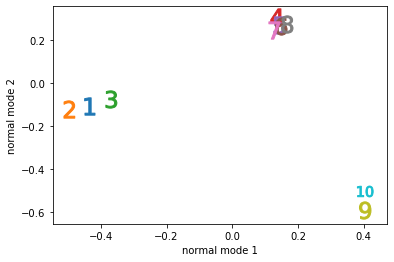

In [8]:
K = K + np.random.uniform(1.0, 3.0, size=(10,10))
normal_modes, vals = GetNormalMode(K, first_few=2)
ScatterNormalMode(normal_modes)

In the plot, the particles from the same cluster are not at exactly the same spot any more. The noise perturbed the clustering method a little bit and the particles from the same cluster are still close to each other in the plot. 

The visualization is clear in the above plot. However, if we have many particles like thousands and we want to do higher dimensional embedding like $4$ dimensional, we cannot do the above plot again. This simply because we cannot draw a $4$-D picture. Thus, we should use a more precise way to see whether the points are put into the correct locations. 
We could calculate the pairwise distance among the particles in the embedding space and plot the pairwise distance value versus the similarity measure $K$. This method does not depend on the dimension of embedding since Euclidean distance can be calculated in any dimension.

In [9]:
def pairwise_distance(coords):
    # coords shape (num_particles, dimension)
    return np.sum( (coords[None,:,:] - coords[:,None,:])**2, axis = -1)

def compareEmbedK(modes, K, ax = None):
    distM = pairwise_distance(normal_modes)
    dists = np.zeros(K.shape[0]*(K.shape[0]-1)//2)
    sims = np.zeros(dists.shape[0])
    count = 0
    for i in range(K.shape[0]):
        for j in range(i+1, K.shape[0]):
            dists[count] = distM[i,j]
            sims[count] = K[i,j]
            count+=1
    if ax is None:
        ax = plt.gca()
    ax.scatter(sims, dists)
    ax.set_ylabel("pairwise distance")
    ax.set_xlabel("pairwise similarity")

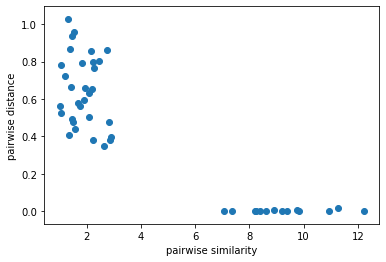

In [10]:
compareEmbedK(normal_modes, K)

From the plot, it is seen that for similarity larger than $7$, the pairwise distance are almost zero while the pairwise distance are greater than 0.3 for similarity value smaller than $6$. This is exactly what we claimed for the embedding algorithm: similar points are closer to each other in the embedding space.  

## Homework

### Problem 1
Show that the lowest eigenvalue of $K_{ij}$ is zero and thus just prove that $K_{ij}$ is positive semi-definite.

### Solution:

For any vector $v$, we can just need to show $vLv \geq 0$. Specifically, 

$$
\begin{aligned}
vLv &= \sum_{ij} (D_{ij} - K_{ij}) v_i v_j \\
&= \sum_{ij} D_{ij}v_i v_j - \sum_{ij} K_{ij} v_i v_j\\
&= \sum_{ij} (D_{ii} \delta_{ij} ) v_i v_j - \sum_{ij} K_{ij} v_i v_j \\
&= \sum_{i} v_i v_i D_{ii} - \sum_{ij} K_{ij} v_i v_j
\end{aligned}
$$

We could use the definition that $D_{ii} = \sum_j K_{ij} $ and we get 

$$
\begin{aligned}
vLv &= \sum_{i} v_i v_i \sum_j K_{ij} - \sum_{ij} K_{ij} v_i v_j \\
&= \sum_{ij}K_{ij} v_i (v_i-v_j) \\
&= \frac{1}{2}\sum_{ij}K_{ij} v_i (v_i-v_j) + \frac{1}{2}\sum_{ij}K_{ij} v_i (v_i-v_j) \\
&= \frac{1}{2}\sum_{ij}K_{ij} v_i (v_i-v_j) + \frac{1}{2}\sum_{ij}K_{ji} v_j (v_j-v_i) \\
&= \frac{1}{2}\sum_{ij}K_{ij} v_i (v_i-v_j) - \frac{1}{2}\sum_{ij}K_{ji} v_j (v_i-v_j) \\
&= \frac{1}{2}\sum_{ij}K_{ij} (v_i-v_j)^2
\end{aligned}
$$
Since $K_{ij} \geq 0$ and $(v_i-v_j)^2 \geq 0$, we conclude that $vLv\geq 0$ and thus it is positive semi-definite.